In [439]:
import requests
import json

import pickle

import pandas as pd

import geopandas as gpd


import numpy as np
import pytz
from pytz import datetime

# DIRETORIAS

In [440]:
import os
print(os.getcwd())

path_POATHabita = os.getcwd()


c:\Users\pauloricardolb\OneDrive - Universidade de Aveiro\TRABALHO_PROJETOS\AP01_ONGOING\POAT\MODELLING\POATHabita_pyWorkspace


In [441]:

#PC UA
pathUA = "c:/Users/pauloricardolb/"
pathHPCasa = "c:/Users/Paulo B/" 

path = pathUA

path_DRIVITUP_SIG = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/"
path_DRIVITUP_TABLES = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/TABELAS/"

In [442]:
sourcePIKLE = path_POATHabita + "/PIKLE_DATA"
sourcePIKLE

'c:\\Users\\pauloricardolb\\OneDrive - Universidade de Aveiro\\TRABALHO_PROJETOS\\AP01_ONGOING\\POAT\\MODELLING\\POATHabita_pyWorkspace/PIKLE_DATA'

In [443]:
sourceRAWDATA = path_POATHabita + "/RAW_DATA"
sourceRAWDATA

'c:\\Users\\pauloricardolb\\OneDrive - Universidade de Aveiro\\TRABALHO_PROJETOS\\AP01_ONGOING\\POAT\\MODELLING\\POATHabita_pyWorkspace/RAW_DATA'

In [444]:
source_POAT_Modelling = path + 'OneDrive - Universidade de Aveiro/TRABALHO_PROJETOS/AP01_ONGOING/POAT/MODELLING/'

In [445]:
sourceSIG_CBOD_shp = path + path_DRIVITUP_SIG + "/CBOD"
sourceSIG_CBOD_shp

'c:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG//CBOD'

# GET DATA FROM SERVER

# OPEN DATA

In [446]:
#ProspectSurveysData_df = pd.read_csv(sourceRAWDATA+'/Prospect_SurveyData_ALL.csv', sep='&', decimal=',')  
#ProspectSurveysData_df.head()

In [447]:
open_file = open(sourcePIKLE + '/POAT_ProspectSurveysData_df.pkl', "rb")
ProspectSurveysData_df = pickle.load(open_file)
open_file.close()



# ETL

## EXTRACT - DEFINE VALID DATA

In [448]:
# ProspectSurveysData_df

In [449]:
# Validated attention tests:
# profile_data.297.value == 708
# profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01 == 3

ProspectSurveysData_VALIDATED = ProspectSurveysData_df[ ['User_ID', 
                                                        'profile_data.227.meta.eigenVector.512',
                                                        'profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes',
                                                        'profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos',
                                                        'profile_data.297.value',
                                                        'profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'
                                                        ] ]
                                                                                                                                                   
ProspectSurveysData_VALIDATED.head()

,User_ID,profile_data.227.meta.eigenVector.512,profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes,profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos,profile_data.297.value,profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01
0,1393,NaN,NaN,NaN,NaN,NaN
1,1392,NaN,NaN,NaN,NaN,NaN
2,1391,NaN,NaN,NaN,NaN,NaN
3,1390,NaN,NaN,NaN,NaN,NaN
4,1389,NaN,NaN,NaN,NaN,NaN


In [450]:
ProspectSurveysData_VALIDATED = ProspectSurveysData_VALIDATED[~ProspectSurveysData_VALIDATED['profile_data.227.meta.eigenVector.512'].isna() &
                                                                      ~ProspectSurveysData_VALIDATED['profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes'].isna() &
                                                                      ~ProspectSurveysData_VALIDATED['profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos'].isna() &
                                                                      ~ProspectSurveysData_VALIDATED['profile_data.297.value'].isna() & 
                                                                      (ProspectSurveysData_VALIDATED['profile_data.297.value'] == 708) &
                                                                      ~ProspectSurveysData_VALIDATED['profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'].isna() & 
                                                                      (ProspectSurveysData_VALIDATED['profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'] == 3) ]
print(ProspectSurveysData_VALIDATED.shape)
ProspectSurveysData_VALIDATED.head()

(261, 6)


,User_ID,profile_data.227.meta.eigenVector.512,profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes,profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos,profile_data.297.value,profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01
19,1374,0.290868,0.184633,0.207224,708.0,3.0
27,1366,0.124206,0.048665,0.062130,708.0,3.0
28,1365,0.156021,0.049650,0.045920,708.0,3.0
30,1363,0.101307,0.055669,0.057637,708.0,3.0
31,1362,0.109545,0.073054,0.065178,708.0,3.0


In [451]:
# INTEREST QUESTIONS IDs:

# 283 - justPlan 1 "Qual considera ser a melhor forma de regular o acesso à habitação condigna"
# 284 - justPlan 2 "Numa situação hipotética em que é responsável por atribuir uma habitação pública, sobre qual família recairia a sua escolha?"

# 278 - Profile 1 - Idade
# 279 - Profile 2 - Sexo
# 280 - Profile 3 - Qualificação
# 281 - Profile 4 - Situação profissional
# 282 - Profile 5 - Profissão

# 226 - Local de Residência actual

# 297 - Attention check 1
# 296 - Attention check 2

# 227 - Preferências por atributos urbanos

# 285 - Preferências por ambientes urbanos I (POS)
# 293 - Preferências por ambientes urbanos II (ANTES)

# 228 - Satisfação com o local de residência actual
# 295 - Avaliação de renovação do ambiente urbano



In [452]:
# Validated attention tests:
# profile_data.297.value == 708
# profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01 == 3

ProspectSurveysData_VALIDATED_strict = ProspectSurveysData_df[ ['User_ID', 
                                                                
                                                                'Questions_Group_Name',
                                                                
                                                                'profile_data.227.meta.eigenVector.512',
                                                                'profile_data.227.meta.r2',

                                                                'profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes',
                                                                'profile_data.293.meta.r2',

                                                                'profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos',
                                                                'profile_data.285.meta.r2',

                                                                'profile_data.297.value',
                                                                'profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'
                                                                ] ]
                                                                                                                                                   
ProspectSurveysData_VALIDATED_strict.head()

,User_ID,Questions_Group_Name,profile_data.227.meta.eigenVector.512,profile_data.227.meta.r2,profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes,profile_data.293.meta.r2,profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos,profile_data.285.meta.r2,profile_data.297.value,profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01
0,1393,Survey_POATHabita23_Anonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1392,Survey_POATHabita23_Anonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1391,Survey_POATHabita23_Anonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1390,Survey_POATHabita23_Anonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1389,Survey_POATHabita23_Anonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [453]:
ProspectSurveysData_VALIDATED_strict = ProspectSurveysData_VALIDATED_strict[ (ProspectSurveysData_VALIDATED_strict['Questions_Group_Name'] != 'Survey_POATHabita23_Login') &
                                                                            ~ProspectSurveysData_VALIDATED_strict['profile_data.227.meta.eigenVector.512'].isna() &
                                                                            ~ProspectSurveysData_VALIDATED_strict['profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes'].isna() &
                                                                            ~ProspectSurveysData_VALIDATED_strict['profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos'].isna() &
                                                                            ~ProspectSurveysData_VALIDATED_strict['profile_data.297.value'].isna() & 
                                                                            (ProspectSurveysData_VALIDATED_strict['profile_data.297.value'] == 708) &
                                                                            ~ProspectSurveysData_VALIDATED_strict['profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'].isna() & 
                                                                            (ProspectSurveysData_VALIDATED_strict['profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01'] == 3) &
                                                                            (ProspectSurveysData_VALIDATED_strict['profile_data.227.meta.r2'] > 0.5) &
                                                                            (ProspectSurveysData_VALIDATED_strict['profile_data.293.meta.r2'] > 0.5) &
                                                                            (ProspectSurveysData_VALIDATED_strict['profile_data.285.meta.r2'] > 0.5)
                                                                            ]
print(ProspectSurveysData_VALIDATED_strict.shape)
ProspectSurveysData_VALIDATED_strict.head()

(227, 10)


,User_ID,Questions_Group_Name,profile_data.227.meta.eigenVector.512,profile_data.227.meta.r2,profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Antes,profile_data.293.meta.r2,profile_data.285.meta.eigenVector.POAT_PED3atr_000_360Pos,profile_data.285.meta.r2,profile_data.297.value,profile_data.296.meta.valuesByColumn.POAT_specific_TU02.POAT_specific_TU01
27,1366,Survey_POATHabita23_Prolific,0.124206,0.744830,0.048665,0.651612,0.062130,0.705346,708.0,3.0
28,1365,Survey_POATHabita23_Prolific,0.156021,0.655983,0.049650,0.640541,0.045920,0.569262,708.0,3.0
31,1362,Survey_POATHabita23_Prolific,0.109545,0.766967,0.073054,0.724648,0.065178,0.831918,708.0,3.0
32,1361,Survey_POATHabita23_Prolific,0.137334,0.767446,0.105169,0.611632,0.100066,0.760029,708.0,3.0
33,1360,Survey_POATHabita23_Prolific,0.111560,0.681270,0.087637,0.681270,0.087388,0.683274,708.0,3.0


## TRANSFORM - SELECT AND TRANSFORM DATA OF INTEREST

### OVERALL QUESTIONS OF INTEREST

In [454]:
# INTEREST QUESTIONS IDs:

# 283 - justPlan 1 "Qual considera ser a melhor forma de regular o acesso à habitação condigna"
# 284 - justPlan 2 "Numa situação hipotética em que é responsável por atribuir uma habitação pública, sobre qual família recairia a sua escolha?"

# 278 - Profile 1 - Idade
# 279 - Profile 2 - Sexo
# 280 - Profile 3 - Qualificação
# 281 - Profile 4 - Situação profissional
# 282 - Profile 5 - Profissão

# 226 - Local de Residência actual

# 297 - Attention check 1
# 296 - Attention check 2

# 227 - Preferências por atributos urbanos

# 285 - Preferências por ambientes urbanos I (POS)
# 293 - Preferências por ambientes urbanos II (ANTES)

# 228 - Satisfação com o local de residência actual
# 295 - Avaliação de renovação do ambiente urbano



In [455]:
# define column names of interest questions to clean the original dataframe

select_cols = [col for col in ProspectSurveysData_df.columns if (('profile_data.283' in col) | 
                                                                 ('profile_data.284' in col) |
                                                                 ('profile_data.278' in col) |
                                                                 ('profile_data.279' in col) |
                                                                 ('profile_data.280' in col) |
                                                                 ('profile_data.281' in col) |
                                                                 ('profile_data.282' in col) |
                                                                 ('profile_data.226' in col) |
                                                                 ('profile_data.297' in col) |
                                                                 ('profile_data.296' in col) |
                                                                 ('profile_data.227' in col) |
                                                                 ('profile_data.285' in col) |
                                                                 ('profile_data.293' in col) |
                                                                 ('profile_data.228' in col) |
                                                                 ('profile_data.295' in col)
                                                                 )] 
select_cols


['profile_data.278.meta.endTime',
 'profile_data.278.meta.isValid',
 'profile_data.278.meta.startTime',
 'profile_data.278.meta.userAgent',
 'profile_data.278.value',
 'profile_data.283.meta.startTime',
 'profile_data.227.meta.r2',
 'profile_data.227.meta.endTime',
 'profile_data.227.meta.isValid',
 'profile_data.227.meta.startTime',
 'profile_data.227.meta.hasValidR2',
 'profile_data.227.meta.eigenVector.512',
 'profile_data.227.meta.eigenVector.513',
 'profile_data.227.meta.eigenVector.514',
 'profile_data.227.meta.eigenVector.515',
 'profile_data.227.meta.eigenVector.516',
 'profile_data.227.meta.eigenVector.517',
 'profile_data.227.meta.numAttempts',
 'profile_data.227.meta.optAscOrder.0',
 'profile_data.227.meta.optAscOrder.1',
 'profile_data.227.meta.optAscOrder.2',
 'profile_data.227.meta.optAscOrder.3',
 'profile_data.227.meta.optAscOrder.4',
 'profile_data.227.meta.optAscOrder.5',
 'profile_data.227.meta.valuesByColumn.512.512',
 'profile_data.227.meta.valuesByColumn.512.513',

In [456]:
select_colsF = [col for col in select_cols if not (('valuesByColumn' in col) )] 
select_colsF

['profile_data.278.meta.endTime',
 'profile_data.278.meta.isValid',
 'profile_data.278.meta.startTime',
 'profile_data.278.meta.userAgent',
 'profile_data.278.value',
 'profile_data.283.meta.startTime',
 'profile_data.227.meta.r2',
 'profile_data.227.meta.endTime',
 'profile_data.227.meta.isValid',
 'profile_data.227.meta.startTime',
 'profile_data.227.meta.hasValidR2',
 'profile_data.227.meta.eigenVector.512',
 'profile_data.227.meta.eigenVector.513',
 'profile_data.227.meta.eigenVector.514',
 'profile_data.227.meta.eigenVector.515',
 'profile_data.227.meta.eigenVector.516',
 'profile_data.227.meta.eigenVector.517',
 'profile_data.227.meta.numAttempts',
 'profile_data.227.meta.optAscOrder.0',
 'profile_data.227.meta.optAscOrder.1',
 'profile_data.227.meta.optAscOrder.2',
 'profile_data.227.meta.optAscOrder.3',
 'profile_data.227.meta.optAscOrder.4',
 'profile_data.227.meta.optAscOrder.5',
 'profile_data.227.meta.comparisionsMatrix',
 'profile_data.227.meta.currentValueMatrix',
 'profi

In [457]:
adit_col_names = ["User_ID", "meta.PROLIFIC_PID", 'Questions_Group_Name']
select_colsF = adit_col_names + select_colsF

# select_cols

In [458]:
POATData_VALIDATED_strict =  ProspectSurveysData_df.loc[ProspectSurveysData_df['User_ID'].isin(ProspectSurveysData_VALIDATED_strict['User_ID'].values), select_colsF]
print(POATData_VALIDATED_strict.shape)
POATData_VALIDATED_strict.head()

(227, 163)


,User_ID,meta.PROLIFIC_PID,Questions_Group_Name,profile_data.278.meta.endTime,profile_data.278.meta.isValid,profile_data.278.meta.startTime,profile_data.278.meta.userAgent,profile_data.278.value,profile_data.283.meta.startTime,profile_data.227.meta.r2,...,profile_data.280.value,profile_data.281.meta.submitted,profile_data.281.value,profile_data.282.value,profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Pos,profile_data.293.meta.eigenVector.POAT_PED3atr_001_360Pos,profile_data.293.meta.eigenVector.POAT_PED3atr_010_360Pos,profile_data.293.meta.eigenVector.POAT_PED3atr_011_360Pos,profile_data.293.meta.eigenVector.POAT_PED3atr_110_360Pos,profile_data.293.meta.eigenVector.POAT_PED3atr_111_360Pos
27,1366,5c573e54e9813700018acc31,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678984e+12,0.744830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1365,5f4e97aae4fe380a7bad99c7,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678983e+12,0.655983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1362,60ad13199b3cffb1ac25fe95,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.766967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1361,60da4ce26cddb624b295c7ff,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678981e+12,0.767446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1360,5e89d0a17ec160000888ee98,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.681270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
print(POATData_VALIDATED_strict.columns)

Index(['User_ID', 'meta.PROLIFIC_PID', 'Questions_Group_Name',
       'profile_data.278.meta.endTime', 'profile_data.278.meta.isValid',
       'profile_data.278.meta.startTime', 'profile_data.278.meta.userAgent',
       'profile_data.278.value', 'profile_data.283.meta.startTime',
       'profile_data.227.meta.r2',
       ...
       'profile_data.280.value', 'profile_data.281.meta.submitted',
       'profile_data.281.value', 'profile_data.282.value',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_001_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_010_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_011_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_110_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_111_360Pos'],
      dtype='object', length=163)


In [460]:
POATData_VALIDATED_strict.drop(['profile_data.293.meta.eigenVector.POAT_PED3atr_000_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_001_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_010_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_011_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_110_360Pos',
       'profile_data.293.meta.eigenVector.POAT_PED3atr_111_360Pos'], inplace=True, axis=1)
POATData_VALIDATED_strict.head()

,User_ID,meta.PROLIFIC_PID,Questions_Group_Name,profile_data.278.meta.endTime,profile_data.278.meta.isValid,profile_data.278.meta.startTime,profile_data.278.meta.userAgent,profile_data.278.value,profile_data.283.meta.startTime,profile_data.227.meta.r2,...,profile_data.296.meta.userAgent,profile_data.297.meta.userAgent,profile_data.278.meta.submitted,profile_data.279.meta.submitted,profile_data.279.value,profile_data.280.meta.submitted,profile_data.280.value,profile_data.281.meta.submitted,profile_data.281.value,profile_data.282.value
27,1366,5c573e54e9813700018acc31,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678984e+12,0.744830,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1365,5f4e97aae4fe380a7bad99c7,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678983e+12,0.655983,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1362,60ad13199b3cffb1ac25fe95,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.766967,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1361,60da4ce26cddb624b295c7ff,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678981e+12,0.767446,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1360,5e89d0a17ec160000888ee98,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.681270,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PROCESS PROFILES

#### DESCODIFICATION OF PROFILE VARIABLES 

In [461]:
Q278_Idade = {'COD_Q278': [655, 656, 657, 716, 658, 659, 660], 'DESCOD_IDADE': ['18-25', '25-30', '30-35', '35-45', '45-55', '55-65', '>65']}
Q280_Qualifica = {'COD_Q280': [664, 665, 666, 667, 668, 669], 'DESCOD_QUALIF': ['Sem Qualifica', 'EB', 'ESecTec', 'SUP_Lic', 'SUP_Mst', 'SUP_Phd']}
Q281_CondPeranteTrab = {'COD_Q281': [670, 671, 672, 673, 674], 'DESCOD_TRAB': ['Emp_Outrem', 'Emp_Propria', 'Desemp', 'Inat_Ref', 'Inat_Outr']}
Q282_Prof = {'COD_Q282': [675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 694], 'DESCOD_PROF': ['Profissões das Forças Armadas', 
                                                                                                  'Representantes do poder legislativo e de órgãos executivos, dirigentes, directores e gestores executivos', 
                                                                                                  'Especialistas das actividades intelectuais e científicas',
                                                                                                  'Técnicos e profissões de nível intermédio',
                                                                                                  'Pessoal administrativo',
                                                                                                  'Trabalhadores dos serviços pessoais, de protecção e segurança e vendedores',
                                                                                                  'Agricultores e trabalhadores qualificados da agricultura, da pesca e da floresta' ,
                                                                                                  'Trabalhadores qualificados da indústria, construção e artífices' ,
                                                                                                  'Operadores de instalações e máquinas e trabalhadores da montagem' ,
                                                                                                  'Trabalhadores não qualificados' ,
                                                                                                  'Não sei / Não respondo'
                                                                                                  ]}

In [462]:
Q278_Idade_map = {"655" : '18-25', "656" : '25-30', "657" : '30-35', "716" : '35-45', "658" : '45-55', "659" : '55-65', "660" : '>65', '<NA>' : 'NA'}
Q280_Qualifica_map = {664 : 'Sem Qualifica', 665 : 'EB', 666 : 'ESecTec', 667 : 'SUP_Lic', 668 : 'SUP_Mst', 669 : 'SUP_Phd'}
Q281_CondPeranteTrab_map = {670 : 'Emp_Outrem', 671 : 'Emp_Propria', 672 : 'Desemp', 673 : 'Inat_Ref', 674 : 'Inat_Outr' }
Q282_Prof_map = {675 : 'Profissões das Forças Armadas', 
                 676 : 'Representantes do poder legislativo e de órgãos executivos, dirigentes, directores e gestores executivos', 
                 677 : 'Especialistas das actividades intelectuais e científicas',
                 678 : 'Técnicos e profissões de nível intermédio', 
                 679 : 'Pessoal administrativo', 
                 680 : 'Trabalhadores dos serviços pessoais, de protecção e segurança e vendedores', 
                 681 : 'Agricultores e trabalhadores qualificados da agricultura, da pesca e da floresta', 
                 682 : 'Trabalhadores qualificados da indústria, construção e artífices', 
                 683 : 'Operadores de instalações e máquinas e trabalhadores da montagem', 
                 684 : 'Trabalhadores não qualificados' , 
                 694 : 'Não sei / Não respondo' }

#### ADD PROLIFIC PROFILE

In [463]:
Prolific_Survey_UsersData = pd.read_csv(path_POATHabita + "/PROLIFIC_DATA/PROLIFIC_SURVEY_6402278844ccb9477e7c779f.csv")
print(Prolific_Survey_UsersData.shape)
Prolific_Survey_UsersData.head()

(130, 19)


,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,6413340adae8f6d21ba1882d,60ca64ec4ea478fcb4d87165,AWAITING REVIEW,2023-03-16T15:21:46.964000Z,2023-03-16T15:39:45.597000Z,NaN,2023-03-16T15:39:46.477503Z,1079,CVCWHIQC,238,38,Female,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
1,6413340c052810f92a561d5b,60d62be71011d9a64042a465,AWAITING REVIEW,2023-03-16T15:21:48.867000Z,2023-03-16T15:34:07.409000Z,NaN,2023-03-16T15:34:07.754748Z,739,CVCWHIQC,79,29,Female,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
2,6413342542ae548fbe4f8697,5f6ab630339f67193e8b487f,AWAITING REVIEW,2023-03-16T15:22:18.879000Z,2023-03-16T15:30:29.734000Z,NaN,2023-03-16T15:30:30.084105Z,491,CVCWHIQC,176,36,Male,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
3,64133435db856ad5b8a3d897,61393c5349b812515afde134,AWAITING REVIEW,2023-03-16T15:22:29.746000Z,2023-03-16T15:32:10.760000Z,NaN,2023-03-16T15:32:11.169882Z,582,CVCWHIQC,33,20,Male,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED
4,6413343e70f797984455261d,5e08d5b38390791d3fc17420,AWAITING REVIEW,2023-03-16T15:22:56.458000Z,2023-03-16T15:31:06.356000Z,NaN,2023-03-16T15:31:06.775943Z,490,CVCWHIQC,92,23,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Due to start a new job within the next month


In [464]:
Prolific_Pilot_UsersData = pd.read_csv(path_POATHabita + "/PROLIFIC_DATA/PROLIFIC_PILOT_63beecaea39982057170242b.csv")
print(Prolific_Pilot_UsersData.shape)
Prolific_Pilot_UsersData.head()

(8, 19)


,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,63d3aac867845023e9b302c3,609075e9a3db190aabf0302c,APPROVED,2023-01-27T10:43:20.420000Z,2023-01-27T10:50:54.368000Z,2023-01-27T10:50:54.860000,2023-01-27T10:50:54.793374Z,454,CVCWHIQC,75,25,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Part-Time
1,63d3aaf1680ab699d3a45031,611fe4688040824ef73652ef,APPROVED,2023-01-27T10:44:03.054000Z,2023-01-27T10:49:45.082000Z,2023-01-27T10:49:58.265000Z,2023-01-27T10:50:09.812339Z,343,CVCWHIQC,161,27,Male,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED
2,63d3aaf6df061f2ef1efcb55,6100174f92a7a0e5141b195e,APPROVED,2023-01-27T10:44:12.253000Z,2023-01-27T10:51:03.739000Z,2023-01-27T10:51:04.117000,2023-01-27T10:51:04.053126Z,412,CVCWHIQC,32,24,Female,White,Portugal,Portugal,Portugal,Portuguese,No,DATA_EXPIRED
3,63d3ab1309478af28f34a053,608d4e91d08ff4d32dbba3ad,APPROVED,2023-01-27T10:44:37.686000Z,2023-01-27T10:55:57.421000Z,2023-01-27T10:55:57.815000,2023-01-27T10:55:57.759743Z,680,CVCWHIQC,163,30,Female,White,Portugal,Portugal,Portugal,Portuguese,Yes,Full-Time
4,63d3ab1b127b39d4869092bf,60db521470b51a50415d3439,APPROVED,2023-01-27T10:46:47.774000Z,2023-01-27T11:02:08.221000Z,2023-01-27T11:02:08.593000,2023-01-27T11:02:08.536504Z,921,CVCWHIQC,345,26,Male,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time


In [465]:
Prolific_Pilot_UsersData.columns

Index(['Submission id', 'Participant id', 'Status', 'Started at',
       'Completed at', 'Reviewed at', 'Archived at', 'Time taken',
       'Completion code', 'Total approvals', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [466]:
Prolific_UsersData = pd.concat([Prolific_Survey_UsersData, Prolific_Pilot_UsersData], axis=0)
print(Prolific_UsersData.shape)
Prolific_UsersData.head()

(138, 19)


,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,6413340adae8f6d21ba1882d,60ca64ec4ea478fcb4d87165,AWAITING REVIEW,2023-03-16T15:21:46.964000Z,2023-03-16T15:39:45.597000Z,NaN,2023-03-16T15:39:46.477503Z,1079,CVCWHIQC,238,38,Female,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
1,6413340c052810f92a561d5b,60d62be71011d9a64042a465,AWAITING REVIEW,2023-03-16T15:21:48.867000Z,2023-03-16T15:34:07.409000Z,NaN,2023-03-16T15:34:07.754748Z,739,CVCWHIQC,79,29,Female,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
2,6413342542ae548fbe4f8697,5f6ab630339f67193e8b487f,AWAITING REVIEW,2023-03-16T15:22:18.879000Z,2023-03-16T15:30:29.734000Z,NaN,2023-03-16T15:30:30.084105Z,491,CVCWHIQC,176,36,Male,White,Portugal,Portugal,Portugal,Portuguese,No,Full-Time
3,64133435db856ad5b8a3d897,61393c5349b812515afde134,AWAITING REVIEW,2023-03-16T15:22:29.746000Z,2023-03-16T15:32:10.760000Z,NaN,2023-03-16T15:32:11.169882Z,582,CVCWHIQC,33,20,Male,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED
4,6413343e70f797984455261d,5e08d5b38390791d3fc17420,AWAITING REVIEW,2023-03-16T15:22:56.458000Z,2023-03-16T15:31:06.356000Z,NaN,2023-03-16T15:31:06.775943Z,490,CVCWHIQC,92,23,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Due to start a new job within the next month


In [467]:
POATData_VALIDATED_strict = POATData_VALIDATED_strict.merge(Prolific_UsersData[['Participant id', 'Age','Employment status']], left_on='meta.PROLIFIC_PID', right_on='Participant id', how='left')
print(POATData_VALIDATED_strict.shape)
POATData_VALIDATED_strict.head()

(227, 160)


,User_ID,meta.PROLIFIC_PID,Questions_Group_Name,profile_data.278.meta.endTime,profile_data.278.meta.isValid,profile_data.278.meta.startTime,profile_data.278.meta.userAgent,profile_data.278.value,profile_data.283.meta.startTime,profile_data.227.meta.r2,...,profile_data.279.meta.submitted,profile_data.279.value,profile_data.280.meta.submitted,profile_data.280.value,profile_data.281.meta.submitted,profile_data.281.value,profile_data.282.value,Participant id,Age,Employment status
0,1366,5c573e54e9813700018acc31,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678984e+12,0.744830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5c573e54e9813700018acc31,29.0,Full-Time
1,1365,5f4e97aae4fe380a7bad99c7,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678983e+12,0.655983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5f4e97aae4fe380a7bad99c7,25.0,"Not in paid work (e.g. homemaker', 'retired or..."
2,1362,60ad13199b3cffb1ac25fe95,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.766967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60ad13199b3cffb1ac25fe95,25.0,Full-Time
3,1361,60da4ce26cddb624b295c7ff,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678981e+12,0.767446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60da4ce26cddb624b295c7ff,24.0,Other
4,1360,5e89d0a17ec160000888ee98,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NaN,1.678982e+12,0.681270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e89d0a17ec160000888ee98,37.0,Full-Time


#### Q278 | PROCESS AGE DATA

In [468]:
POATData_VALIDATED_strict[['Age']]

,Age
0,29.0
1,25.0
2,25.0
3,24.0
4,37.0
...,...
222,NaN
223,NaN
224,NaN
225,NaN


In [469]:
prolific_age_class = POATData_VALIDATED_strict['Age']
prolific_age_class = prolific_age_class.astype(str)
prolific_age_class

0      29.0
1      25.0
2      25.0
3      24.0
4      37.0
       ... 
222     nan
223     nan
224     nan
225     nan
226     nan
Name: Age, Length: 227, dtype: object

In [470]:
prolific_age_class = np.where((POATData_VALIDATED_strict['Age']) <= 25, '18-25', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 25) & (POATData_VALIDATED_strict['Age'] <= 30), '25-30', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 30) & (POATData_VALIDATED_strict['Age'] <= 35), '30-35', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 35) & (POATData_VALIDATED_strict['Age'] <= 45), '35-45', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 45) & (POATData_VALIDATED_strict['Age'] <= 55), '45-55', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 55) & (POATData_VALIDATED_strict['Age'] <= 65), '55-65', prolific_age_class)
prolific_age_class = np.where((POATData_VALIDATED_strict['Age'] > 65) , '>65', prolific_age_class)
prolific_age_class

array(['25-30', '18-25', '18-25', '18-25', '35-45', '35-45', '25-30',
       '45-55', '18-25', '>65', '18-25', '18-25', '25-30', '35-45',
       '18-25', '35-45', '18-25', '25-30', '18-25', '18-25', '18-25',
       '18-25', '25-30', '18-25', '45-55', '30-35', '25-30', '35-45',
       '18-25', '18-25', '25-30', '35-45', '18-25', '18-25', '25-30',
       '35-45', '35-45', '18-25', '35-45', '18-25', '18-25', '35-45',
       '18-25', '18-25', '18-25', '25-30', '25-30', '18-25', '18-25',
       '18-25', '45-55', '18-25', '18-25', '18-25', '18-25', '18-25',
       '18-25', '18-25', '25-30', '18-25', '18-25', '30-35', '18-25',
       '18-25', '18-25', '35-45', '25-30', '18-25', '25-30', '18-25',
       '25-30', '18-25', '25-30', '30-35', '18-25', '18-25', '18-25',
       '18-25', '25-30', '18-25', '25-30', '18-25', '25-30', '18-25',
       '25-30', '18-25', '30-35', '18-25', '18-25', '18-25', '18-25',
       '25-30', '18-25', '18-25', '18-25', '25-30', '25-30', '18-25',
       '35-45', '25-30

In [471]:
len(prolific_age_class)

227

In [472]:
prolific_age_class2 = POATData_VALIDATED_strict['Age']
prolific_age_class2 = prolific_age_class2.astype(str)
prolific_age_class2 = np.where((POATData_VALIDATED_strict['Age']) <= 25, '18-25', prolific_age_class2)
prolific_age_class2 = np.where((POATData_VALIDATED_strict['Age'] > 25) & (POATData_VALIDATED_strict['Age'] <= 30), '25-30', prolific_age_class2)
prolific_age_class2 = np.where((POATData_VALIDATED_strict['Age'] > 30) & (POATData_VALIDATED_strict['Age'] <= 45), '30-45', prolific_age_class2)
prolific_age_class2 = np.where((POATData_VALIDATED_strict['Age'] > 45) & (POATData_VALIDATED_strict['Age'] <= 65), '45-65', prolific_age_class2)
prolific_age_class2 = np.where((POATData_VALIDATED_strict['Age'] > 65) , '>65', prolific_age_class2)
prolific_age_class2

array(['25-30', '18-25', '18-25', '18-25', '30-45', '30-45', '25-30',
       '45-65', '18-25', '>65', '18-25', '18-25', '25-30', '30-45',
       '18-25', '30-45', '18-25', '25-30', '18-25', '18-25', '18-25',
       '18-25', '25-30', '18-25', '45-65', '30-45', '25-30', '30-45',
       '18-25', '18-25', '25-30', '30-45', '18-25', '18-25', '25-30',
       '30-45', '30-45', '18-25', '30-45', '18-25', '18-25', '30-45',
       '18-25', '18-25', '18-25', '25-30', '25-30', '18-25', '18-25',
       '18-25', '45-65', '18-25', '18-25', '18-25', '18-25', '18-25',
       '18-25', '18-25', '25-30', '18-25', '18-25', '30-45', '18-25',
       '18-25', '18-25', '30-45', '25-30', '18-25', '25-30', '18-25',
       '25-30', '18-25', '25-30', '30-45', '18-25', '18-25', '18-25',
       '18-25', '25-30', '18-25', '25-30', '18-25', '25-30', '18-25',
       '25-30', '18-25', '30-45', '18-25', '18-25', '18-25', '18-25',
       '25-30', '18-25', '18-25', '18-25', '25-30', '25-30', '18-25',
       '30-45', '25-30

In [473]:
POATData_VALIDATED_strict['profile_data.278.value'] = POATData_VALIDATED_strict['profile_data.278.value'].astype('Int64')
POATData_VALIDATED_strict['profile_data.278.value'] = POATData_VALIDATED_strict['profile_data.278.value'].astype(str)

In [474]:
POATData_VALIDATED_strict['profile_data.278.value'].unique()

array(['<NA>', '656', '655', '659', '716', '658', '657', '660'],
      dtype=object)

In [475]:
Q278_Idade_map

{'655': '18-25',
 '656': '25-30',
 '657': '30-35',
 '716': '35-45',
 '658': '45-55',
 '659': '55-65',
 '660': '>65',
 '<NA>': 'NA'}

In [476]:
POATData_VALIDATED_strict = POATData_VALIDATED_strict.replace({"profile_data.278.value": Q278_Idade_map})

In [477]:
POATData_VALIDATED_strict['profile_data.278.value'].unique()

array(['NA', '25-30', '18-25', '55-65', '35-45', '45-55', '30-35', '>65'],
      dtype=object)

In [478]:
POATData_VALIDATED_strict['profile_data.278B.value'] = POATData_VALIDATED_strict['profile_data.278.value']

In [479]:
POATData_VALIDATED_strict.columns

Index(['User_ID', 'meta.PROLIFIC_PID', 'Questions_Group_Name',
       'profile_data.278.meta.endTime', 'profile_data.278.meta.isValid',
       'profile_data.278.meta.startTime', 'profile_data.278.meta.userAgent',
       'profile_data.278.value', 'profile_data.283.meta.startTime',
       'profile_data.227.meta.r2',
       ...
       'profile_data.279.value', 'profile_data.280.meta.submitted',
       'profile_data.280.value', 'profile_data.281.meta.submitted',
       'profile_data.281.value', 'profile_data.282.value', 'Participant id',
       'Age', 'Employment status', 'profile_data.278B.value'],
      dtype='object', length=161)

In [480]:
Q278_Idade_map2 = {"18-25" : '18-25', "25-30" : '25-30', "30-35" : '30-45', '35-45' : '30-45', '45-55' : '45-65', '55-65' : '45-65', ">65" : '>65', 'NA' : 'NA'}

In [481]:
POATData_VALIDATED_strict = POATData_VALIDATED_strict.replace({"profile_data.278B.value": Q278_Idade_map2})

In [482]:
POATData_VALIDATED_strict['profile_data.278B.value'].unique()

array(['NA', '25-30', '18-25', '45-65', '30-45', '>65'], dtype=object)

In [483]:
POATData_VALIDATED_strict_age1 = POATData_VALIDATED_strict['profile_data.278.value']
POATData_VALIDATED_strict_age1 = np.where( (POATData_VALIDATED_strict['profile_data.278.value'] == 'NA') , prolific_age_class, POATData_VALIDATED_strict_age1)

POATData_VALIDATED_strict_age2 = POATData_VALIDATED_strict['profile_data.278B.value']
POATData_VALIDATED_strict_age2 = np.where( (POATData_VALIDATED_strict['profile_data.278B.value'] == 'NA') , prolific_age_class2, POATData_VALIDATED_strict_age2)

In [484]:
POATData_VALIDATED_strict_age1 = pd.DataFrame(POATData_VALIDATED_strict_age1)
POATData_VALIDATED_strict_age2 = pd.DataFrame(POATData_VALIDATED_strict_age2)
POATData_VALIDATED_strictF = pd.concat([POATData_VALIDATED_strict, POATData_VALIDATED_strict_age1], axis=1)
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.rename(columns={POATData_VALIDATED_strictF.columns[161]: "AGE1"})
POATData_VALIDATED_strictF = pd.concat([POATData_VALIDATED_strictF, POATData_VALIDATED_strict_age2], axis=1)
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.rename(columns={POATData_VALIDATED_strictF.columns[162]: "AGE2"})
POATData_VALIDATED_strictF.columns

Index(['User_ID', 'meta.PROLIFIC_PID', 'Questions_Group_Name',
       'profile_data.278.meta.endTime', 'profile_data.278.meta.isValid',
       'profile_data.278.meta.startTime', 'profile_data.278.meta.userAgent',
       'profile_data.278.value', 'profile_data.283.meta.startTime',
       'profile_data.227.meta.r2',
       ...
       'profile_data.280.value', 'profile_data.281.meta.submitted',
       'profile_data.281.value', 'profile_data.282.value', 'Participant id',
       'Age', 'Employment status', 'profile_data.278B.value', 'AGE1', 'AGE2'],
      dtype='object', length=163)

In [485]:
POATData_VALIDATED_strictF.head(3)

,User_ID,meta.PROLIFIC_PID,Questions_Group_Name,profile_data.278.meta.endTime,profile_data.278.meta.isValid,profile_data.278.meta.startTime,profile_data.278.meta.userAgent,profile_data.278.value,profile_data.283.meta.startTime,profile_data.227.meta.r2,...,profile_data.280.value,profile_data.281.meta.submitted,profile_data.281.value,profile_data.282.value,Participant id,Age,Employment status,profile_data.278B.value,AGE1,AGE2
0,1366,5c573e54e9813700018acc31,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NA,1.678984e+12,0.744830,...,NaN,NaN,NaN,NaN,5c573e54e9813700018acc31,29.0,Full-Time,NA,25-30,25-30
1,1365,5f4e97aae4fe380a7bad99c7,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NA,1.678983e+12,0.655983,...,NaN,NaN,NaN,NaN,5f4e97aae4fe380a7bad99c7,25.0,"Not in paid work (e.g. homemaker', 'retired or...",NA,18-25,18-25
2,1362,60ad13199b3cffb1ac25fe95,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NA,1.678982e+12,0.766967,...,NaN,NaN,NaN,NaN,60ad13199b3cffb1ac25fe95,25.0,Full-Time,NA,18-25,18-25


#### Q226 | PROFILES HOME LOCATION 

In [486]:
# profile_data.226.meta.endTime
# profile_data.226.meta.isValid
# profile_data.226.meta.startTime
# profile_data.226.meta.userAgent
# profile_data.226.value.userLocation.center.lat
# profile_data.226.value.userLocation.center.lng
# profile_data.226.value.userLocation.markers
# profile_data.226.value.userLocation.location

# POATData_VALIDATED_strictF['profile_data.226.value.userLocation.location'] 

POATData_VALIDATED_strictF_LOCATIONxy = POATData_VALIDATED_strictF.loc[POATData_VALIDATED_strictF[['profile_data.226.value.userLocation.center.lat','profile_data.226.value.userLocation.center.lng']].notnull().all(1), ['User_ID', 'profile_data.226.value.userLocation.center.lat','profile_data.226.value.userLocation.center.lng'] ]
POATData_VALIDATED_strictF_LOCATIONxy.head(2)


,User_ID,profile_data.226.value.userLocation.center.lat,profile_data.226.value.userLocation.center.lng
101,1228,40.569799,-8.057567
102,1214,41.130003,-8.649932


<AxesSubplot: >

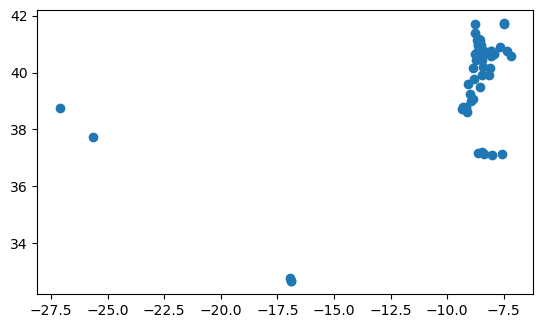

In [395]:
POATData_VALIDATED_strictF_LOCATIONxy = gpd.GeoDataFrame(POATData_VALIDATED_strictF_LOCATIONxy, geometry=gpd.points_from_xy(POATData_VALIDATED_strictF_LOCATIONxy['profile_data.226.value.userLocation.center.lng'], POATData_VALIDATED_strictF_LOCATIONxy['profile_data.226.value.userLocation.center.lat']))
POATData_VALIDATED_strictF_LOCATIONxy = POATData_VALIDATED_strictF_LOCATIONxy.set_crs(epsg=4326)
POATData_VALIDATED_strictF_LOCATIONxy.plot()

In [487]:
POATData_VALIDATED_strictF_LOCATIONxy.shape

(118, 3)

##### Location by CBOD

In [396]:
pedacos_CBOD_shp = gpd.read_file(sourceSIG_CBOD_shp + '\AE_AVRILH_CBOD1.shp')
pedacos_CBOD_shp_wgs84 = pedacos_CBOD_shp.to_crs(epsg=4326)
print(pedacos_CBOD_shp.crs)
pedacos_CBOD_descodifica = pd.read_excel(source_POAT_Modelling + 'POAT_PEDACO_TIPO2.xlsx', sheet_name='CBOD_Real_to_PedTipoPOAT', dtype = {"Pedaco_cod": np.str} )
pedacos_CBOD_descodifica.head(2)


epsg:3763


C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_31116\4125478784.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pedacos_CBOD_descodifica = pd.read_excel(source_POAT_Modelling + 'POAT_PEDACO_TIPO2.xlsx', sheet_name='CBOD_Real_to_PedTipoPOAT', dtype = {"Pedaco_cod": np.str} )


,Pedaco_cod,Pedaco_cod2,Pedaco,PEDTIPO1,PEDTIPO2,Edif_tipo,Grau_urbe,Movimento,Morfologia,Logradouro,Prox_eq_co,Atr_Edif_tipo,Atr_Grau_urbe,Atr_Movimento,Atr_Morfologia,Atr_Logradouro,Atr_Prox_eq_co,PED_COD_TIPO,PED_COD_TIPO_5atr,PED_COD_TIPO_3atr
0,02010101,2010101,Aradas 1,30142b,30142,unifamiliar,mistura de espaþos agro-florestais,sossegado,modernista,grande,a mais de 10 minutos a pÚ,1,0,1,0,0,0,P010010,Pb10100,Pc100
1,02010102,2010102,Aradas 2,30142a,30142,unifamiliar,mistura de espaþos agro-florestais,sossegado,modernista,mÚdio,a mais de 10 minutos a pÚ,1,0,1,0,0,0,P010010,Pb10100,Pc100


In [397]:
pedacos_CBOD_shp_wgs84.head(2)

,Pedaço_cod,geometry
0,02010101,"POLYGON ((-8.64184 40.62628, -8.64166 40.62605..."
1,02010102,"POLYGON ((-8.64530 40.62064, -8.64538 40.62070..."


In [398]:
pedacos_CBOD_shp_wgs84 = pedacos_CBOD_shp_wgs84.merge(pedacos_CBOD_descodifica[["Pedaco_cod", "Pedaco_cod2", "Pedaco", "PEDTIPO2", "PED_COD_TIPO_3atr" ]], left_on='Pedaço_cod', right_on='Pedaco_cod', how='left')
pedacos_CBOD_shp_wgs84.head(2)

,Pedaço_cod,geometry,Pedaco_cod,Pedaco_cod2,Pedaco,PEDTIPO2,PED_COD_TIPO_3atr
0,02010101,"POLYGON ((-8.64184 40.62628, -8.64166 40.62605...",02010101,2010101,Aradas 1,30142,Pc100
1,02010102,"POLYGON ((-8.64530 40.62064, -8.64538 40.62070...",02010102,2010102,Aradas 2,30142,Pc100


In [399]:
POATData_VALIDATED_strictF_LOCATIONxy_withCBOD = POATData_VALIDATED_strictF_LOCATIONxy.sjoin(pedacos_CBOD_shp_wgs84, how="left", op='intersects')
POATData_VALIDATED_strictF_LOCATIONxy_withCBOD.head(2)

c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\IPython\core\interactiveshell.py:3433: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,User_ID,profile_data.226.value.userLocation.center.lat,profile_data.226.value.userLocation.center.lng,geometry,index_right,Pedaço_cod,Pedaco_cod,Pedaco_cod2,Pedaco,PEDTIPO2,PED_COD_TIPO_3atr
101,1228,40.569799,-8.057567,POINT (-8.05757 40.56980),NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1214,41.130003,-8.649932,POINT (-8.64993 41.13000),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
POATData_VALIDATED_strictF_LOCATIONxy_withCBOD = POATData_VALIDATED_strictF_LOCATIONxy_withCBOD.reset_index(drop=True)


##### Clusters POAT Andre

In [401]:
open_file = open(sourcePIKLE + '/data_aveiro.pickle', "rb")
clusterAI_Andre = pickle.load(open_file)
open_file.close()


In [402]:
clusterAI_Andre = clusterAI_Andre[['D',"geometry"]].dissolve(by='D')
clusterAI_Andre = clusterAI_Andre.reset_index()
clusterAI_Andre = clusterAI_Andre.set_crs(epsg=3763)
clusterAI_Andre_wgs84 = clusterAI_Andre.to_crs(epsg=4326)
clusterAI_Andre_wgs84 = clusterAI_Andre_wgs84.reset_index(drop=True)

In [403]:
POATData_VALIDATED_strictF_LOCATIONxy_withClustAndr = POATData_VALIDATED_strictF_LOCATIONxy.sjoin(clusterAI_Andre_wgs84, how="left")
POATData_VALIDATED_strictF_LOCATIONxy_withClustAndr.head(2)

,User_ID,profile_data.226.value.userLocation.center.lat,profile_data.226.value.userLocation.center.lng,geometry,index_right,D
101,1228,40.569799,-8.057567,POINT (-8.05757 40.56980),NaN,NaN
102,1214,41.130003,-8.649932,POINT (-8.64993 41.13000),NaN,NaN


In [404]:
POATData_VALIDATED_strictF_LOCATION_byPlaces = POATData_VALIDATED_strictF_LOCATIONxy_withClustAndr[["User_ID", "D"]]
POATData_VALIDATED_strictF_LOCATION_byPlaces = POATData_VALIDATED_strictF_LOCATION_byPlaces.merge(POATData_VALIDATED_strictF_LOCATIONxy_withCBOD[["User_ID", "PED_COD_TIPO_3atr"]], on='User_ID', how='left')

In [405]:
POATData_VALIDATED_strictF_LOCATION_byPlaces.columns

Index(['User_ID', 'D', 'PED_COD_TIPO_3atr'], dtype='object')

In [406]:
POATData_VALIDATED_strictF_LOCATION_byPlaces["PED_COD_TIPO_3atr"].fillna("OUT_of_CBOD_AVRILH", inplace = True)
POATData_VALIDATED_strictF_LOCATION_byPlaces["D"].fillna("OUT_of_InterventionCluster", inplace = True)

In [407]:
POATData_VALIDATED_strictF_LOCATION_byPlaces = POATData_VALIDATED_strictF_LOCATION_byPlaces.replace(
                {"PED_COD_TIPO_3atr" : {'Pc919191' : 'Residual_91',
                                        'Pc929292' : 'Residual_92',
                                        'Pc939393' : 'Residual_93'}})
POATData_VALIDATED_strictF_LOCATION_byPlaces.head()

,User_ID,D,PED_COD_TIPO_3atr
0,1228,OUT_of_InterventionCluster,OUT_of_CBOD_AVRILH
1,1214,OUT_of_InterventionCluster,OUT_of_CBOD_AVRILH
2,1184,OUT_of_InterventionCluster,OUT_of_CBOD_AVRILH
3,1179,OUT_of_InterventionCluster,OUT_of_CBOD_AVRILH
4,1176,OUT_of_InterventionCluster,Pc011


In [408]:
POATData_VALIDATED_strictF_LOCATION_byPlaces.pivot_table(index=['PED_COD_TIPO_3atr'], values="User_ID", dropna=False, aggfunc=np.size)

,User_ID
PED_COD_TIPO_3atr,
OUT_of_CBOD_AVRILH,65
Pc000,1
Pc010,15
Pc011,18
Pc100,6
Pc110,4
Pc111,2
Residual_91,5
Residual_92,1


In [409]:
POATData_VALIDATED_strictF_LOCATION_byPlaces.pivot_table(index=['D'], values="User_ID", dropna=False, aggfunc=np.size)

,User_ID
D,
1.0,11
OUT_of_InterventionCluster,107


In [410]:
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.merge(POATData_VALIDATED_strictF_LOCATION_byPlaces, on='User_ID', how='left')

In [411]:
POATData_VALIDATED_strictF.head(2)

,User_ID,meta.PROLIFIC_PID,Questions_Group_Name,profile_data.278.meta.endTime,profile_data.278.meta.isValid,profile_data.278.meta.startTime,profile_data.278.meta.userAgent,profile_data.278.value,profile_data.283.meta.startTime,profile_data.227.meta.r2,...,profile_data.281.value,profile_data.282.value,Participant id,Age,Employment status,profile_data.278B.value,AGE1,AGE2,D,PED_COD_TIPO_3atr
0,1366,5c573e54e9813700018acc31,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NA,1.678984e+12,0.744830,...,NaN,NaN,5c573e54e9813700018acc31,29.0,Full-Time,NA,25-30,25-30,NaN,NaN
1,1365,5f4e97aae4fe380a7bad99c7,Survey_POATHabita23_Prolific,NaN,NaN,NaN,NaN,NA,1.678983e+12,0.655983,...,NaN,NaN,5f4e97aae4fe380a7bad99c7,25.0,"Not in paid work (e.g. homemaker', 'retired or...",NA,18-25,18-25,NaN,NaN


##### Clusters by CAOP

In [412]:
sourceSIG_BASE_CAOP_gdb = path + path_DRIVITUP_SIG + "BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb"
sourceSIG_BASE_CAOP_gdb

'c:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb'

In [413]:
import fiona
fiona.listlayers(sourceSIG_BASE_CAOP_gdb)

['CAOP2012v1_FREG_ONEPOLY',
 'CAOP2018_FREG_ONEPOLY',
 'MUNICIPIOS18',
 'NUTSIII2016_CIM_BASECAOP',
 'CAOP2018_FREG_ONEPOLY_LxCORRIGIDO',
 'NUTSIII2016_CIM_BASECAOP_LxCORRIGIDO',
 'MUNICIPIOS18_LxCORRIGIDO',
 'LISTA_SEDE_MUNICIPIOS_v1',
 'LISTA_SEDE_MUNICIPIOS_PTCONT',
 'LISTA_SEDE_MUNICIPIOS_PTCONT_byFREG18',
 'PT_LxCORRIGIDO',
 'INTERSECT_CAOP2018_CAOP2012v1_BGRI11_MUNI_NUTSIII16',
 'NUTSIII2003_BASEEU',
 'NUTSIII2003_BASEEU_PT_CONTINENTE',
 'INTERSECT_MUNICIPIOS18_NUTSIII_2003',
 'NUTSIII2003_BASECAOP18',
 'INTERSECT_FREG2018Lxc_NUTSIII2003_BASECAOP18',
 'INTERSECT_FREG2018Lxc_NUTSIII2016_BASECAOP18',
 'CAOP2018_FREG_ONEPOLY_LxCORRIGIDO_WGS84',
 'NUTSII2016_CIM_BASECAOP_LxCORRIGIDO',
 'NUTSIII2016_CIM_REGIAOAVEIRO_BASECAOP_LxCORRIGIDO',
 'NUTSIII2016_CIM_REGIAOAVEIRO_MUNICIPIOS_BASECAOP_LxCORRIGIDO']

In [414]:
CAOP2018_FREG = gpd.read_file(sourceSIG_BASE_CAOP_gdb, layer="CAOP2018_FREG_ONEPOLY")

In [415]:
MUNICIPIOS18 = gpd.read_file(sourceSIG_BASE_CAOP_gdb, layer="MUNICIPIOS18")
MUNICIPIOS18.head(2)

,MUNICOD18,MUNI18_la,AREAMUNI18,MUNICOD18b,Shape_Length,Shape_Area,geometry
0,0101,ÁGUEDA,335.273987,101,104682.434077,3.352744e+08,"MULTIPOLYGON (((-20560.758 113803.912, -20550...."
1,0102,ALBERGARIA-A-VELHA,158.824997,102,81964.692525,1.588250e+08,"MULTIPOLYGON (((-26966.491 123573.381, -26964...."


In [416]:
CAOP2018_FREG = CAOP2018_FREG.set_crs(epsg=3763)
CAOP2018_FREG_wgs84 = CAOP2018_FREG.to_crs(epsg=4326)
CAOP2018_FREG_wgs84 = CAOP2018_FREG_wgs84.reset_index(drop=True)

In [417]:
CAOP2018_FREG_wgs84['MUNICOD'] = CAOP2018_FREG_wgs84.DICOFRE18.str[:4]

In [418]:
CAOP2018_FREG_wgs84 = CAOP2018_FREG_wgs84.merge(MUNICIPIOS18[["MUNICOD18", "MUNI18_la"]], left_on='MUNICOD', right_on = "MUNICOD18", how='left')
CAOP2018_FREG_wgs84.head(3)

,DICOFRE18,FREG18_la,Shape_Length,Shape_Area,AREAFREG18,geometry,MUNICOD,MUNICOD18,MUNI18_la
0,010103,Aguada de Cima,23909.109267,2.839308e+07,2.839308e+07,"MULTIPOLYGON (((-8.39821 40.54350, -8.39781 40...",0101,0101,ÁGUEDA
1,010109,Fermentelos,12531.601733,8.581997e+06,8.581997e+06,"MULTIPOLYGON (((-8.50227 40.56837, -8.50229 40...",0101,0101,ÁGUEDA
2,010112,Macinhata do Vouga,28947.657454,3.195442e+07,3.195442e+07,"MULTIPOLYGON (((-8.37453 40.67857, -8.37452 40...",0101,0101,ÁGUEDA


In [419]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP = POATData_VALIDATED_strictF_LOCATIONxy.sjoin(CAOP2018_FREG_wgs84, how="left", op='intersects')
print(POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.shape)
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.head(2)

c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\IPython\core\interactiveshell.py:3433: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(118, 13)


,User_ID,profile_data.226.value.userLocation.center.lat,profile_data.226.value.userLocation.center.lng,geometry,index_right,DICOFRE18,FREG18_la,Shape_Length,Shape_Area,AREAFREG18,MUNICOD,MUNICOD18,MUNI18_la
101,1228,40.569799,-8.057567,POINT (-8.05757 40.56980),2842.0,182133,União das freguesias de Vilar de Besteiros e M...,20792.424936,2.197955e+07,2.197955e+07,1821,1821,TONDELA
102,1214,41.130003,-8.649932,POINT (-8.64993 41.13000),1987.0,131704,Canidelo,15707.260779,8.930821e+06,8.930821e+06,1317,1317,VILA NOVA DE GAIA


In [420]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP['LOCATION_AVRILH'] = np.where( (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["MUNICOD"] == '0105') | (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["MUNICOD"]== '0110') , POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["FREG18_la"], "FORA_AVEIRO_ILHAVO")
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.head(3)

,User_ID,profile_data.226.value.userLocation.center.lat,profile_data.226.value.userLocation.center.lng,geometry,index_right,DICOFRE18,FREG18_la,Shape_Length,Shape_Area,AREAFREG18,MUNICOD,MUNICOD18,MUNI18_la,LOCATION_AVRILH
101,1228,40.569799,-8.057567,POINT (-8.05757 40.56980),2842.0,182133,União das freguesias de Vilar de Besteiros e M...,20792.424936,2.197955e+07,2.197955e+07,1821,1821,TONDELA,FORA_AVEIRO_ILHAVO
102,1214,41.130003,-8.649932,POINT (-8.64993 41.13000),1987.0,131704,Canidelo,15707.260779,8.930821e+06,8.930821e+06,1317,1317,VILA NOVA DE GAIA,FORA_AVEIRO_ILHAVO
103,1184,40.183930,-8.405278,POINT (-8.40528 40.18393),947.0,060318,Santo António dos Olivais,22986.067902,1.927333e+07,1.927333e+07,0603,0603,COIMBRA,FORA_AVEIRO_ILHAVO


In [421]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP['LOCATION_AVRILH'] = np.where( (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["MUNICOD"] == '0105') | (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["MUNICOD"]== '0110') , np.where( (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["FREG18_la"] == "União das freguesias de Glória e Vera Cruz") | (POATData_VALIDATED_strictF_LOCATIONxy_withCAOP["FREG18_la"] == "Ílhavo (São Salvador)"), "CENTRO_AVEIRO_ou_ILHAVO", "PERIFERIA_AVEIRO_ILHAVO"), "FORA_AVEIRO_ILHAVO")

In [422]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.shape

(118, 14)

In [423]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.pivot_table(index=['LOCATION_AVRILH'], values="User_ID", dropna=True, aggfunc=np.size)

,User_ID
LOCATION_AVRILH,
CENTRO_AVEIRO_ou_ILHAVO,35
FORA_AVEIRO_ILHAVO,65
PERIFERIA_AVEIRO_ILHAVO,18


In [424]:
POATData_VALIDATED_strictF_LOCATIONxy_withCAOP.columns

Index(['User_ID', 'profile_data.226.value.userLocation.center.lat',
       'profile_data.226.value.userLocation.center.lng', 'geometry',
       'index_right', 'DICOFRE18', 'FREG18_la', 'Shape_Length', 'Shape_Area',
       'AREAFREG18', 'MUNICOD', 'MUNICOD18', 'MUNI18_la', 'LOCATION_AVRILH'],
      dtype='object')

In [425]:
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.merge(POATData_VALIDATED_strictF_LOCATIONxy_withCAOP[["User_ID",'DICOFRE18', 'FREG18_la', 'MUNICOD18', 'MUNI18_la', 'LOCATION_AVRILH']], on='User_ID', how='left')

In [426]:
POATData_VALIDATED_strictF['LOCATION_GLOBAL'] = POATData_VALIDATED_strictF['LOCATION_AVRILH']
POATData_VALIDATED_strictF['LOCATION_GLOBAL'] = POATData_VALIDATED_strictF['LOCATION_GLOBAL'].fillna("FORA_AVEIRO_ILHAVO")

In [429]:
POATData_VALIDATED_strictF.pivot_table(index=['LOCATION_GLOBAL'], values="User_ID", dropna=False, aggfunc=np.size)

,User_ID
LOCATION_GLOBAL,
CENTRO_AVEIRO_ou_ILHAVO,35
FORA_AVEIRO_ILHAVO,174
PERIFERIA_AVEIRO_ILHAVO,18


### PROCESS EXTRA QUESTIONS

#### Q228 
228 - Satisfação com o local de residência actual

In [430]:
POATData_VALIDATED_strictF_Q228 = POATData_VALIDATED_strictF[['User_ID', 'profile_data.228.value']] 
POATData_VALIDATED_strictF_Q228.head(2)

,User_ID,profile_data.228.value
0,1366,521.0
1,1365,721.0


In [431]:
Q228_Descodifica1 = { 518 : 'Totalmente Insatisfeito', 
                 519 : 'Razoavelmente Insatisfeito', 
                 720 : 'Ligeiramente Insatisfeito',
                 520 : 'Neutro', 
                 721 : 'Ligeiramente Satisfeito', 
                 521 : 'Razoavelmente Satisfeito', 
                 522 : 'Totalmente Satisfeito', 
                 523 : 'Não sabe / Não responde' }

Q228_Descodifica2 = { 518 : '1', 
                 519 : '2', 
                 720 : '3',
                 520 : '4', 
                 721 : '5', 
                 521 : '6', 
                 522 : '7', 
                 523 : 'NA' }

Q228_Descodifica3 = { 518 : '-1', 
                 519 : '-1', 
                 720 : '-1',
                 520 : '0', 
                 721 : '1', 
                 521 : '1', 
                 522 : '1', 
                 523 : 'NA' }

In [432]:
POATData_VALIDATED_strictF_Q228["Satisfacao_Residencia_1"] = POATData_VALIDATED_strictF_Q228['profile_data.228.value']
POATData_VALIDATED_strictF_Q228["Satisfacao_Residencia_2"] = POATData_VALIDATED_strictF_Q228['profile_data.228.value']
POATData_VALIDATED_strictF_Q228["Satisfacao_Residencia_3"] = POATData_VALIDATED_strictF_Q228['profile_data.228.value']

POATData_VALIDATED_strictF_Q228 = POATData_VALIDATED_strictF_Q228.replace({'Satisfacao_Residencia_1' : Q228_Descodifica1})
POATData_VALIDATED_strictF_Q228 = POATData_VALIDATED_strictF_Q228.replace({'Satisfacao_Residencia_2' : Q228_Descodifica2})
POATData_VALIDATED_strictF_Q228 = POATData_VALIDATED_strictF_Q228.replace({'Satisfacao_Residencia_3' : Q228_Descodifica3})
POATData_VALIDATED_strictF_Q228.head(2)


C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_31116\2750254103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POATData_VALIDATED_strictF_Q228["Satisfacao_Residencia_1"] = POATData_VALIDATED_strictF_Q228['profile_data.228.value']
C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_31116\2750254103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POATData_VALIDATED_strictF_Q228["Satisfacao_Residencia_2"] = POATData_VALIDATED_strictF_Q228['profile_data.228.value']
C:\Users\pauloricardolb\AppDat

,User_ID,profile_data.228.value,Satisfacao_Residencia_1,Satisfacao_Residencia_2,Satisfacao_Residencia_3
0,1366,521.0,Razoavelmente Satisfeito,6,1
1,1365,721.0,Ligeiramente Satisfeito,5,1


In [433]:
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.merge(POATData_VALIDATED_strictF_Q228, on='User_ID', how='left')

#### Q295
295 - Avaliação de renovação do ambiente urbano

In [434]:
POATData_VALIDATED_strictF_Q295 = POATData_VALIDATED_strictF[['User_ID', 'profile_data.295.value']] 
POATData_VALIDATED_strictF_Q295.head(2)

,User_ID,profile_data.295.value
0,1366,714.0
1,1365,723.0


In [435]:
Q295_Descodifica1 = { 711 : 'Nem melhor / Nem pior', 
                 712 : 'Muito pior', 
                 713 : 'Pior',
                 722 : 'Ligeiramente pior', 
                 723 : 'Ligeiramente melhor', 
                 714 : 'Melhor', 
                 715 : 'Muito melhor' }

Q295_Descodifica2 = { 711 : '4', 
                 712 : '1', 
                 713 : '2',
                 722 : '3', 
                 723 : '5', 
                 714 : '6', 
                 715 : '7' }

Q295_Descodifica3 = { 711 : '0', 
                 712 : '-1', 
                 713 : '-1',
                 722 : '-1', 
                 723 : '1', 
                 714 : '1', 
                 715 : '1' }

In [436]:
POATData_VALIDATED_strictF_Q295["Avaliacao_AmbienteUrbano_1"] = POATData_VALIDATED_strictF_Q295['profile_data.295.value']
POATData_VALIDATED_strictF_Q295["Avaliacao_AmbienteUrbano_2"] = POATData_VALIDATED_strictF_Q295['profile_data.295.value']
POATData_VALIDATED_strictF_Q295["Avaliacao_AmbienteUrbano_3_bin"] = POATData_VALIDATED_strictF_Q295['profile_data.295.value']

POATData_VALIDATED_strictF_Q295 = POATData_VALIDATED_strictF_Q295.replace({'Avaliacao_AmbienteUrbano_1' : Q295_Descodifica1})
POATData_VALIDATED_strictF_Q295 = POATData_VALIDATED_strictF_Q295.replace({'Avaliacao_AmbienteUrbano_2' : Q295_Descodifica2})
POATData_VALIDATED_strictF_Q295 = POATData_VALIDATED_strictF_Q295.replace({'Avaliacao_AmbienteUrbano_3_bin' : Q295_Descodifica3})
POATData_VALIDATED_strictF_Q295.head(2)

C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_31116\826268632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POATData_VALIDATED_strictF_Q295["Avaliacao_AmbienteUrbano_1"] = POATData_VALIDATED_strictF_Q295['profile_data.295.value']
C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_31116\826268632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POATData_VALIDATED_strictF_Q295["Avaliacao_AmbienteUrbano_2"] = POATData_VALIDATED_strictF_Q295['profile_data.295.value']
C:\Users\pauloricardolb\Ap

,User_ID,profile_data.295.value,Avaliacao_AmbienteUrbano_1,Avaliacao_AmbienteUrbano_2,Avaliacao_AmbienteUrbano_3_bin
0,1366,714.0,Melhor,6,1
1,1365,723.0,Ligeiramente melhor,5,1


In [437]:
POATData_VALIDATED_strictF = POATData_VALIDATED_strictF.merge(POATData_VALIDATED_strictF_Q295, on='User_ID', how='left')

# SAVE DATA

In [438]:
open_file = open(sourcePIKLE + '/POATData_VALIDATED_strictF.pkl', "wb")
pickle.dump(POATData_VALIDATED_strictF, open_file)
open_file.close()